In [1]:
import geopandas as gpd
# set a default matplotlib figure size
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

world = gpd.read_file('../assets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

world.head(3)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [2]:
world.columns.values

array(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF',
       'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF',
       'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV',
       'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0',
       'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8',
       'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR',
       'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2',
       'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3',
       'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO',
       'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU',
       'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN',
       'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB',
       'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA',
       'ADM0_A3_EG

<AxesSubplot: >

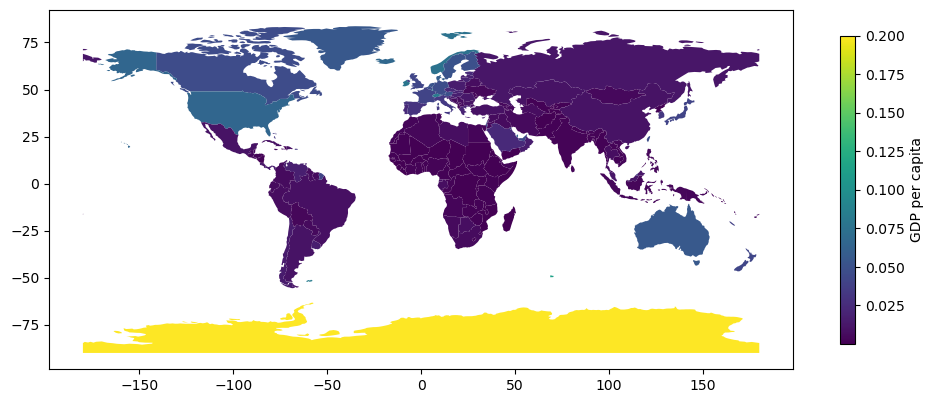

In [3]:
# convert population to billions and save to new column
world['GDP_PC'] = world['GDP_MD'] / world['POP_EST']


world.plot(column='GDP_PC', legend=True, legend_kwds={"shrink":.5, "label": "GDP per capita"})

In [4]:
print(world[world.ADMIN=='Antarctica' ].GDP_MD)
print(world[world.ADMIN=='Antarctica' ].POP_EST)

159    898
Name: GDP_MD, dtype: int64
159    4490.0
Name: POP_EST, dtype: float64


<AxesSubplot: >

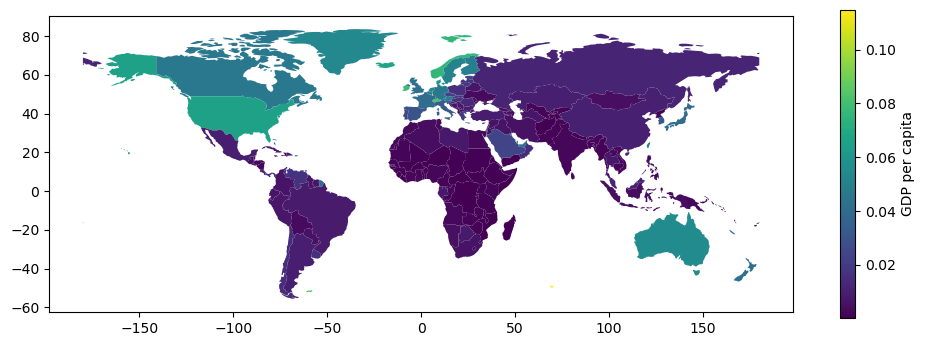

In [5]:
world[world.ADMIN!='Antarctica' ].plot(column='GDP_PC', legend=True, legend_kwds={"shrink":.5, "label": "GDP per capita"})


<AxesSubplot: >

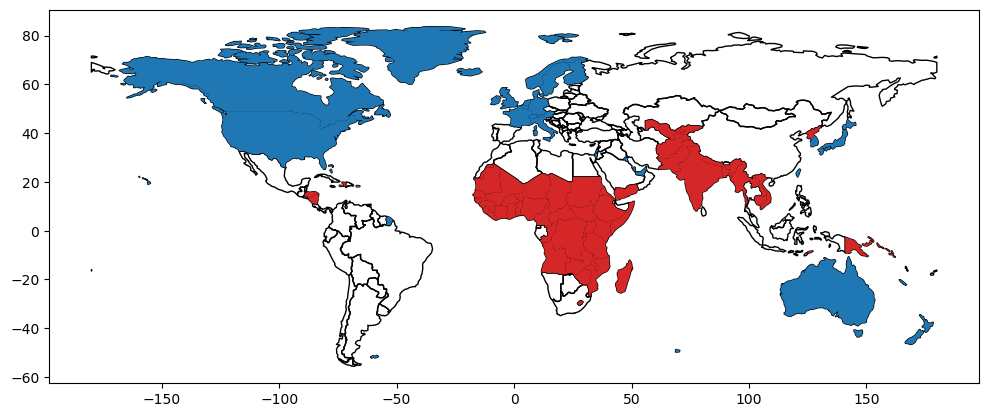

In [6]:
ax = world[world.ADMIN!='Antarctica' ].plot(facecolor='none', legend=True)

world[(world.ADMIN!='Antarctica') & (world.GDP_PC < 0.003) ].plot(ax=ax, color="tab:red")
world[(world.ADMIN!='Antarctica') & (world.GDP_PC > 0.03) ].plot(ax=ax, color="tab:blue")
